In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [12]:
data = pd.read_csv("./EEG-dummy-data.csv") 
data.head()


,P7,P4,Cz,Pz,P3,P8,O1,O2,T8,F8,C4,F4,Fz,C3,F3,T7,F7,time
0,-11254952,30495862,11319807,72731904,43899185,4891972,25779773,1680708,20743722,37207976,20308773,40423000,35259699,-400000047,21398852,-17949480,20976181,1.535627e+12
1,-11255031,30494362,11320033,72730763,43898897,4891936,25777034,1680516,20742914,37205421,20307657,40420656,35257460,-400000047,21396945,-17950437,20974452,1.535627e+12
2,-11251443,30499042,11324859,72737041,43903810,4897398,25783658,1684883,20747967,37210296,20310366,40423798,35260730,-400000047,21399379,-17946928,20978164,1.535627e+12
3,-11257843,30493954,11319837,72732610,43898489,4893021,25778208,1679600,20742842,37204687,20305874,40417231,35254766,-400000047,21392484,-17954941,20971092,1.535627e+12
4,-11259273,30495027,11321271,72733970,43897945,4893644,25776749,1679298,20743923,37204569,20305633,40416733,35252675,-400000047,21392377,-17955492,20969137,1.535627e+12


In [13]:
data["pandas_SMA"] = data["P3"].rolling(window=25).mean()
data.head()

,P7,P4,Cz,Pz,P3,P8,O1,O2,T8,F8,C4,F4,Fz,C3,F3,T7,F7,time,pandas_SMA
0,-11254952,30495862,11319807,72731904,43899185,4891972,25779773,1680708,20743722,37207976,20308773,40423000,35259699,-400000047,21398852,-17949480,20976181,1.535627e+12,NaN
1,-11255031,30494362,11320033,72730763,43898897,4891936,25777034,1680516,20742914,37205421,20307657,40420656,35257460,-400000047,21396945,-17950437,20974452,1.535627e+12,NaN
2,-11251443,30499042,11324859,72737041,43903810,4897398,25783658,1684883,20747967,37210296,20310366,40423798,35260730,-400000047,21399379,-17946928,20978164,1.535627e+12,NaN
3,-11257843,30493954,11319837,72732610,43898489,4893021,25778208,1679600,20742842,37204687,20305874,40417231,35254766,-400000047,21392484,-17954941,20971092,1.535627e+12,NaN
4,-11259273,30495027,11321271,72733970,43897945,4893644,25776749,1679298,20743923,37204569,20305633,40416733,35252675,-400000047,21392377,-17955492,20969137,1.535627e+12,NaN


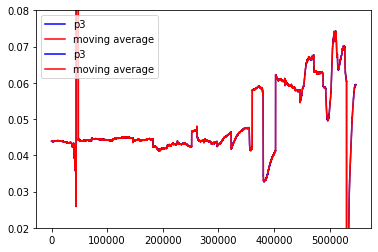

In [14]:
samples = 25

p3 = data["P3"] / 1e9


movingAverageTS = p3.rolling(window=samples).mean()

plt.figure()
ax1 = p3.plot(color="blue", label="p3")
ax2 = movingAverageTS.plot(color="red", label="moving average")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
ax1.set_ylim(0.02, 0.08)
ax2.set_ylim(0.02, 0.08)
plt.show()

#movingAverageTS.plot()


In [15]:
p3.head()

0    0.043899
1    0.043899
2    0.043904
3    0.043898
4    0.043898
Name: P3, dtype: float64

/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


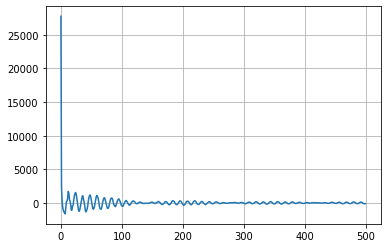

In [16]:
p3_np = p3.to_numpy()
fft_of_example = sp.fftpack.fft(p3_np)

x_axis = np.array(range(0, 500))

plt.plot(x_axis, fft_of_example[0:500])
plt.grid()
plt.show()


/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


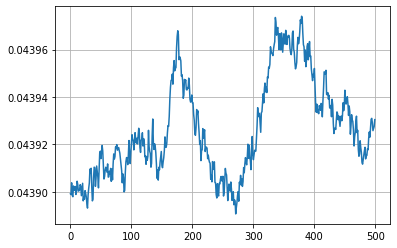

In [17]:
inverse_fft_of_example = sp.fftpack.ifft(fft_of_example)

plt.plot(x_axis, inverse_fft_of_example[0:500])
plt.grid()
plt.show()

In [18]:
#ARIMA
#import warnings
#warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

train, test = train_test_split(p3, test_size=0.2)

In [19]:
import itertools
p=d=q=range(0, 2)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [20]:
import math

best_param = (0,0,0)
best_aic = math.inf
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        aic = model_arima_fit.aic
        if (aic < best_aic):
            best_aic = aic
            best_param = param
            print(param, model_arima_fit.aic, "new best fit")
        else:
            print(param, model_arima_fit.aic)
    except Exception as e:
        print(e)
        continue
print(best_param, best_aic, "Completed, best fit")


/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


(0, 0, 0) -1787061.7215765852 new best fit


/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


(0, 0, 1) -1787062.2421269282 new best fit


/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


(0, 1, 0) -1482662.1999082312


/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


(0, 1, 1) -1786943.852073803


/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


(1, 0, 0) -1787062.2319503385


/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


(1, 0, 1) -1787060.7862430268


/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


(1, 1, 0) -1608658.913604227


/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-pac

(1, 1, 1) -1786944.837562919
(0, 0, 1) -1787062.2421269282 Completed, best fit


In [27]:
# GARCH 
from arch import arch_model

garch = arch_model(train ,  vol='garch', p=1, o=0, q=1)
garch_fitted = garch.fit()



/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/arch/univariate/base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009867. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 608990651804.659
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1568693414300.9304
Iteration:      3,   Func. Count:     35,   Neg. LLF: 4002190452.2202473
Iteration:      4,   Func. Count:     49,   Neg. LLF: 2074371204.5688329
Optimization terminated successfully    (Exit mode 0)
            Current function value: -892475.5350688471
            Iterations: 4
            Function evaluations: 59
            Gradient evaluations: 4
